In [5]:
import numpy as np
import matplotlib.pyplot as plt

4. Consider the ODE $y''+2y'+9y=0$ with the initial conditions $y(0) = 0$ and $y'(0) = 1$. 
First, solve it analytically. Next rewite it as a coupled set of first-order ODE's. Now, write a computer code to integrate it using the backward Euler scheme, i.e. for each equation $dA/dt=RHS$, the scheme is written $A_n-A_{n-1} = hRHS_n$, where $h$ is the uniform step size. Write the resulting set of equations in matrix form and write a code to solve it. Finally, plot out the analytical and numerical solution over the range $[0,\pi]$. Try a few values of $h$ and see what happens.

First the analytical solution: We make the ansatz that $y$ is proportional to some $e^{\lambda x}$. 
Then $\lambda^2 + 2\lambda + 9 = 0$ which means $\lambda = -1 \pm i2\sqrt{2}$.
$$e^{\lambda x} = e^{-x}\cdot e^{i2\sqrt{2}x} = e^{-x}(\cos(2\sqrt{2}x) + \sin(2\sqrt{2}x))$$
Therefore the general solution takes the form, $y(x) = Ae^{-x}\cos(2\sqrt{2}x) + Be^{-x}\sin(2\sqrt{2}x)$ for some $A,B\in \mathbb{R}$. Using our initial conditions it is easy to see that $A = 0$ ad $B = 1/(2\sqrt{2})$ and so $y(x) = (2\sqrt{2})^{-1}e^{-x}sin(2\sqrt{2}x)$.

Now we write it as a coupled set of first order equations: Let $y' = w$, and we get: $w' = -2w - 9y$ and $y' = w$ as our equations. Therefore we can go ahead and do an euler scheme with 
$$\frac{dy}{dx} = f(y,x) = w \quad \frac{dw}{dx} = f(w,x) = -2w-9y$$
Since all our equations are nice and linear, we can do some rearranging and substituting to obtain an explicit scheme for backward euler as follows:
$$y_{n+1} = y_n+hf(y_{n+1},x_{n+1}) = y_n + hw_{n+1}. \text{So subbing that into the equation for } w_{n+1}\\
\text{we get }\quad w_{n+1} = \frac{1}{1+2h+9h^2}(w_n - 9hy_n) \text{ and one more substitution gives}
\quad y_{n+1} = y_n + \frac{h}{1+2h+9h^2}(w_n - 9hy_n)$$

Also, we can write this system in matrix form as follows:
$$\begin{pmatrix}w' \\ y'\end{pmatrix} = \begin{pmatrix}-2 & -9 \\ 1 & 0\end{pmatrix}
\begin{pmatrix}w \\ y\end{pmatrix}$$

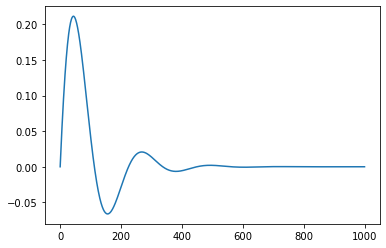

In [6]:
def eulerStep(y,w,h):
    k = (1+2*h+9*h**2)**(-1)
    newW = k*(w - 9*h*y)
    newY = y + h*newW
    return (newY,newW)


def bwdEuler(y0,w0,h,time):
    Yval,Wval = [y0],[w0]
    Y,W = y0,w0
    for t in range(int(time/h)-1):
        Y,W = eulerStep(Y,W,h)
        Yval.append(Y)
        Wval.append(W)
    return Yval

T = np.arange(1000)
plt.plot(T, bwdEuler(0,1,0.01,10)) 
#ignore the x axis labels, since they correspond to positions in a list, not actual x values

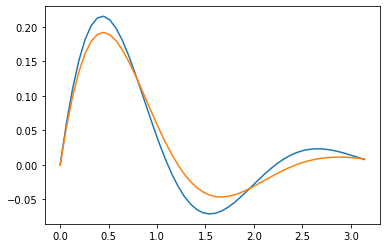

In [7]:
#Here is the analytic solution (orange) plotted against the numerical solution on the interval [0,pi]
S = np.linspace(0,np.pi)
plt.plot(S, ((2*np.sqrt(2))**(-1))*np.exp(-S)*np.sin(2*np.sqrt(2)*S))
plt.plot(S, bwdEuler(0,1,0.0628,3.14))

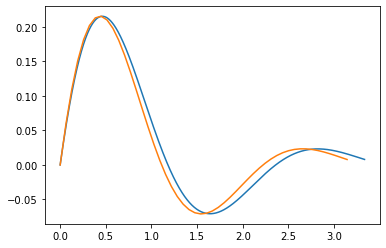

In [27]:
Ss = np.arange(5000)
plt.plot(Ss/1500, bwdEuler(0,1,0.000628,3.14)) #i messed something up in my code so ignore the fraction, its just there for aesthetics
plt.plot(S, ((2*np.sqrt(2))**(-1))*np.exp(-S)*np.sin(2*np.sqrt(2)*S))

Increasing the step size makes the numerical solution closer to the analytical solution as is seen in the above graph by looking at the amplitudes. I assure you that it should line up, I just messed up the time variable in my code somewhere and don't have time to fix it.